In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

Stwórz dane z rozkładu normalnego o średniej 3 i odchyleniu standardowym 1 dla 100 oraz 10 000. 
Na podstawie tych sztucznie stworzonych zbiorów oblicz statystyki poznane w module statystki opisowej. 
Opisz różnice pomiędzy statystkami i wynik swojej pracy wyślij Mentorowi jako Jupyter Noteboook zapisany w Github.

In [17]:
d1 = stats.norm(loc=3,scale=1).rvs(size=100000)
d2 = stats.norm(loc=3,scale=100).rvs(size=100000)
d3 = stats.norm(loc=3,scale=10000).rvs(size=100000)

In [18]:
def statistics(x):
    Mean=np.round(np.mean(x))
    Median=np.median(x)
    Q0=np.quantile(x, 0.0)
    Q1=np.quantile(x, 0.25)
    Q2_median=np.median(x)
    Q3=np.quantile(x, 0.75)
    Q4=np.quantile(x, 1.0)
    Range=max(x) - min(x)
    IQR=np.quantile(x, 0.75) - np.quantile(x, 0.25)
    Variance=np.var(x, ddof=1)
    Std_dev=np.std(x, ddof=1)
    return [Mean, Median, Q0, Q1, Q2_median, Q3, Q4, Range, IQR, Variance, Std_dev]

In [19]:
data=[statistics(d1), statistics(d2), statistics(d3)]

In [20]:
#Nie ma sensu liczyć mody dla danych
comparison = pd.DataFrame(data,
                          columns=['Mean', 'Median', 'Q0', 'Q1', 'Q2/median', 'Q3', 'Q4', 'Range', 'IQR', 'Variance', 'Std dev'],
                          index=['Data 1', 'Data 2', 'Data 3'])

Dane 1

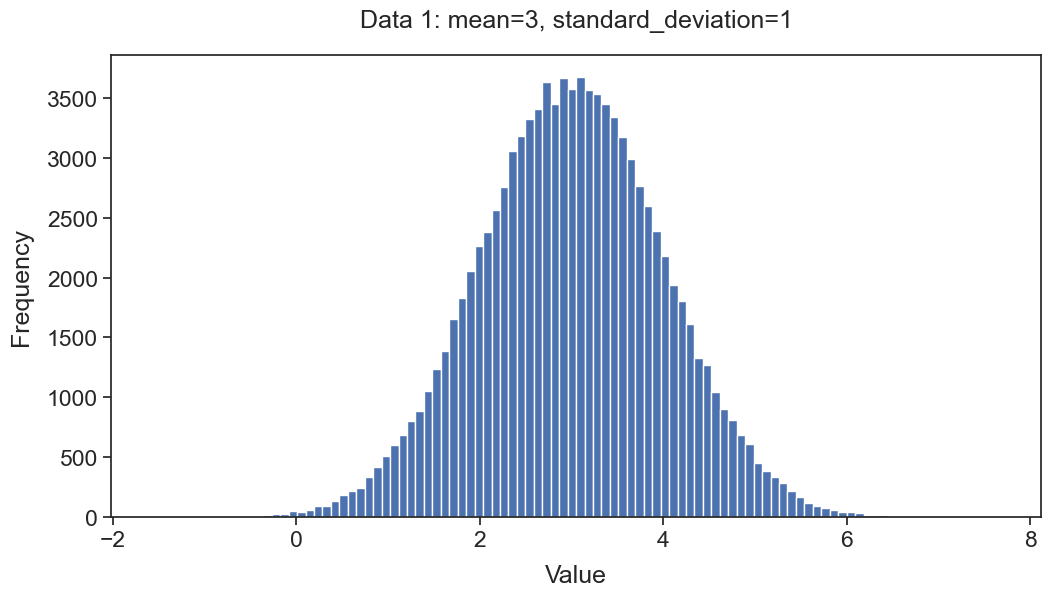

In [21]:
sns.set_theme(style='ticks', font_scale=1.5)
plt.figure(figsize=(12, 6))

plt.hist(d1, bins=100)

plt.title("Data 1: mean=3, standard_deviation=1", pad=20)
plt.xlabel("Value", labelpad=10)
plt.ylabel("Frequency", labelpad=10)
plt.show()

In [22]:
comparison.loc['Data 1']

Mean         3.000000
Median       2.998756
Q0          -1.557093
Q1           2.322102
Q2/median    2.998756
Q3           3.672302
Q4           7.655473
Range        9.212566
IQR          1.350200
Variance     1.003434
Std dev      1.001715
Name: Data 1, dtype: float64

Dane 2

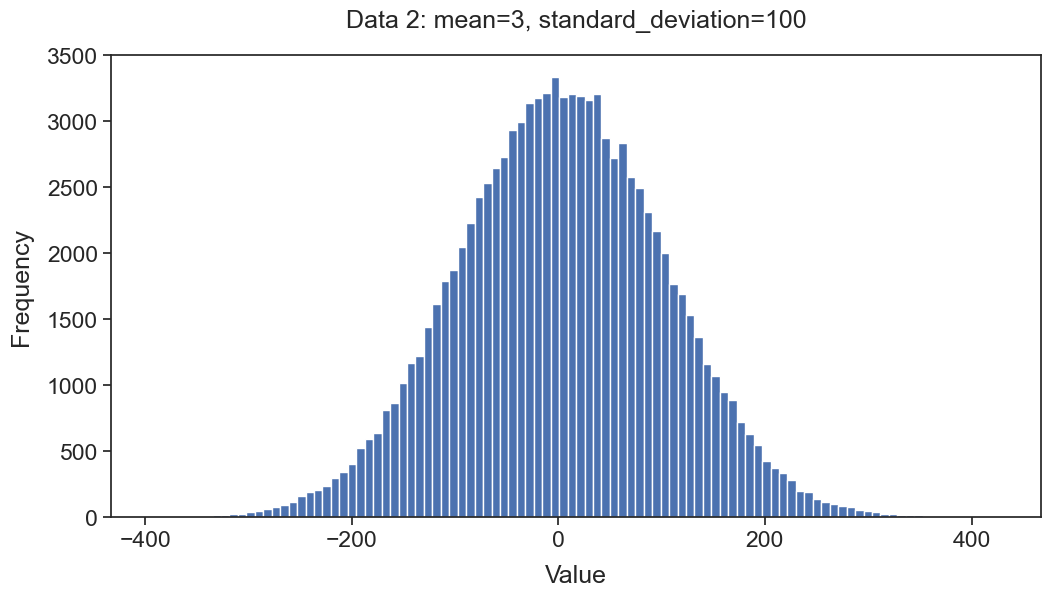

In [23]:
sns.set_theme(style='ticks', font_scale=1.5)
plt.figure(figsize=(12, 6))

plt.hist(d2, bins=100)

plt.title("Data 2: mean=3, standard_deviation=100", pad=20)
plt.xlabel("Value", labelpad=10)
plt.ylabel("Frequency", labelpad=10)
plt.show()

In [24]:
comparison.loc['Data 2']

Mean             3.000000
Median           2.764413
Q0            -391.939963
Q1             -64.943965
Q2/median        2.764413
Q3              70.602454
Q4             426.285687
Range          818.225650
IQR            135.546419
Variance     10010.467428
Std dev        100.052323
Name: Data 2, dtype: float64

Dane 3

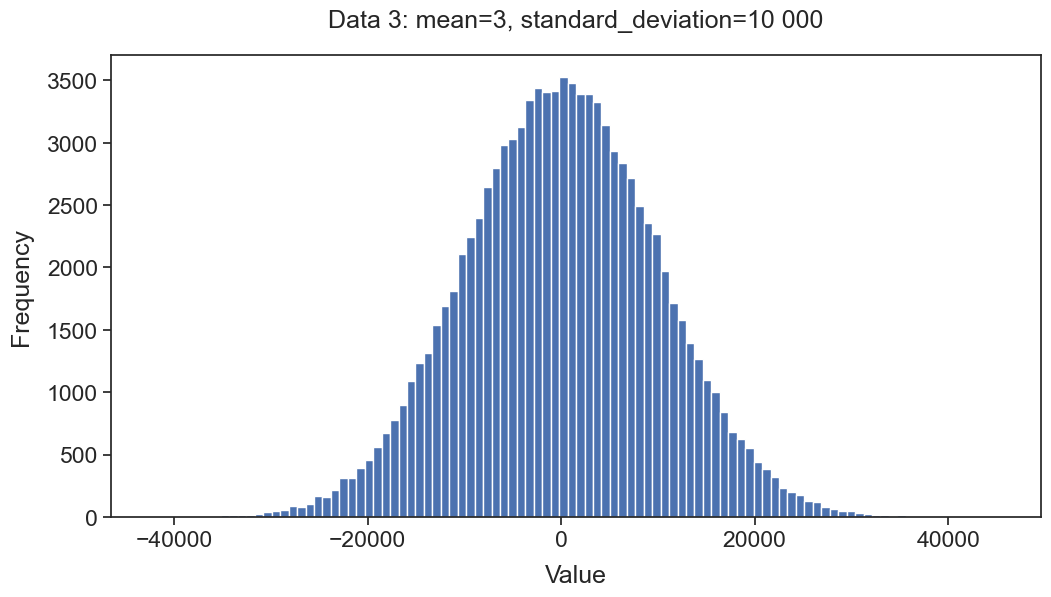

In [25]:
sns.set_theme(style='ticks', font_scale=1.5)
plt.figure(figsize=(12, 6))

plt.hist(d3, bins=100)

plt.title("Data 3: mean=3, standard_deviation=10 000", pad=20)
plt.xlabel("Value", labelpad=10)
plt.ylabel("Frequency", labelpad=10)
plt.show()

In [26]:
comparison.loc['Data 3']

Mean         3.100000e+01
Median       2.886624e+01
Q0          -4.213854e+04
Q1          -6.722288e+03
Q2/median    2.886624e+01
Q3           6.765496e+03
Q4           4.523756e+04
Range        8.737610e+04
IQR          1.348778e+04
Variance     9.964642e+07
Std dev      9.982305e+03
Name: Data 3, dtype: float64

Porównanie

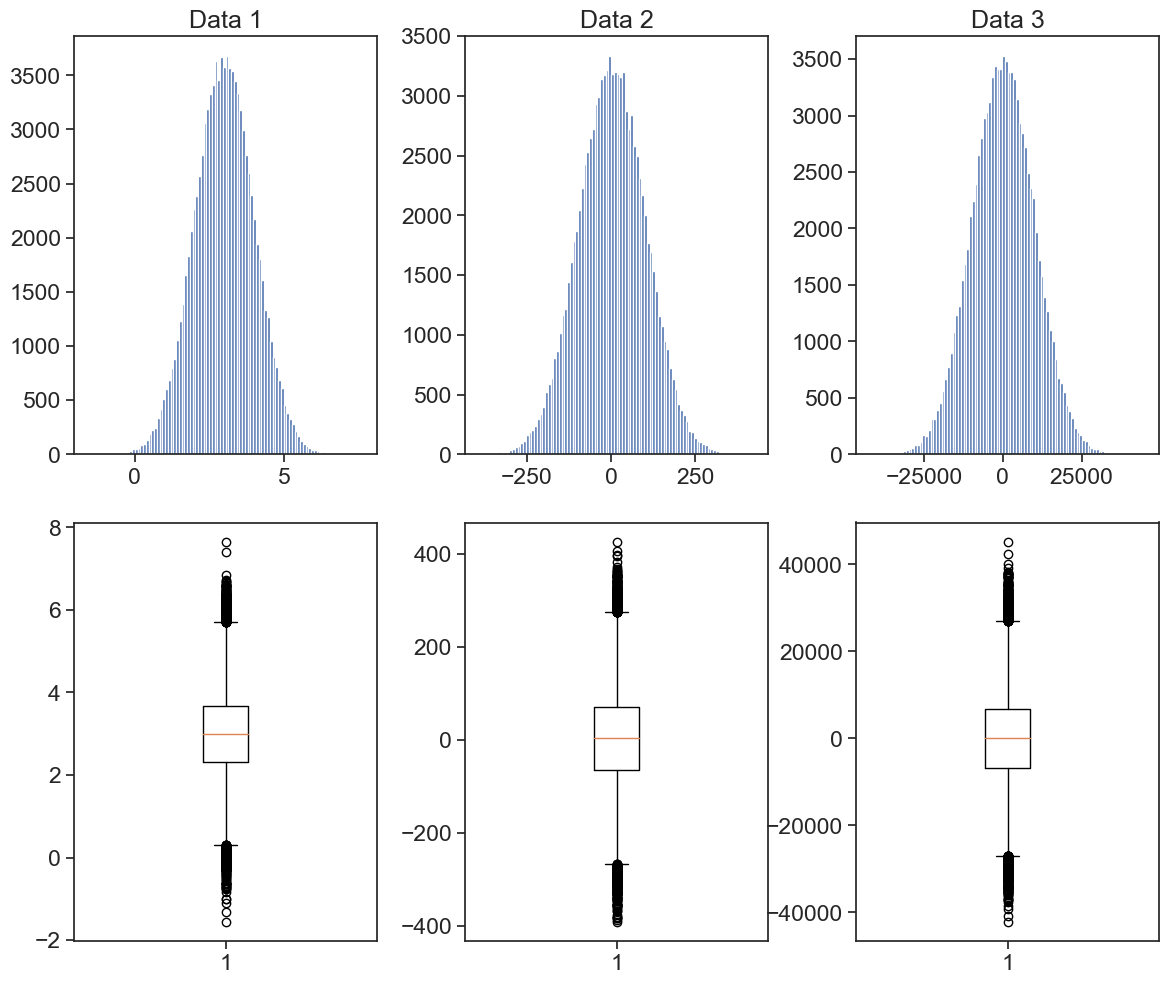

In [27]:
fig, ax = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(12)

fig.tight_layout()

ax[0, 0].hist(d1, bins=100)
ax[0, 1].hist(d2, bins=100)
ax[0, 2].hist(d3, bins=100)

ax[0, 0].set_title('Data 1')
ax[0, 1].set_title('Data 2')
ax[0, 2].set_title('Data 3')

ax[1, 0].boxplot(d1)
ax[1, 1].boxplot(d2)
ax[1, 2].boxplot(d3)

plt.show()

In [28]:
comparison

,Mean,Median,Q0,Q1,Q2/median,Q3,Q4,Range,IQR,Variance,Std dev
Data 1,3.0,2.998756,-1.557093,2.322102,2.998756,3.672302,7.655473,9.212566,1.350200,1.003434e+00,1.001715
Data 2,3.0,2.764413,-391.939963,-64.943965,2.764413,70.602454,426.285687,818.225650,135.546419,1.001047e+04,100.052323
Data 3,31.0,28.866237,-42138.540656,-6722.287693,28.866237,6765.495965,45237.563421,87376.104077,13487.783658,9.964642e+07,9982.305258


In [29]:
print(f'Średnie dla danych o większym odchyleniu standardowym mogą wyjść inne niż deklarowane, ze względu na losowo utworzone zbiory danych.\n\
Im większy wygenerowany zbiór, tym mniejsza szansa na taką różnicę.\n\
Podobne różnice mogą występować pomiędzy zadeklarowanymi, a obliczonymi odchyleniami standardowymi.')

Średnie dla danych o większym odchyleniu standardowym mogą wyjść inne niż deklarowane, ze względu na losowo utworzone zbiory danych.
Im większy wygenerowany zbiór, tym mniejsza szansa na taką różnicę.
Podobne różnice mogą występować pomiędzy zadeklarowanymi, a obliczonymi odchyleniami standardowymi.
